In [1]:
import tensorflow as tf
from tensorflow import keras #high level api on top of tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.cifar10.load_data() #return 2 touple 1st touple will have train information 2nd touple will have train labels
print(train_images.shape) # ((60000, 28, 28)) (number,h,w)

170500096/170498071 [==============================] - 192s 1us/step
(50000, 32, 32, 3)


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
catagories = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

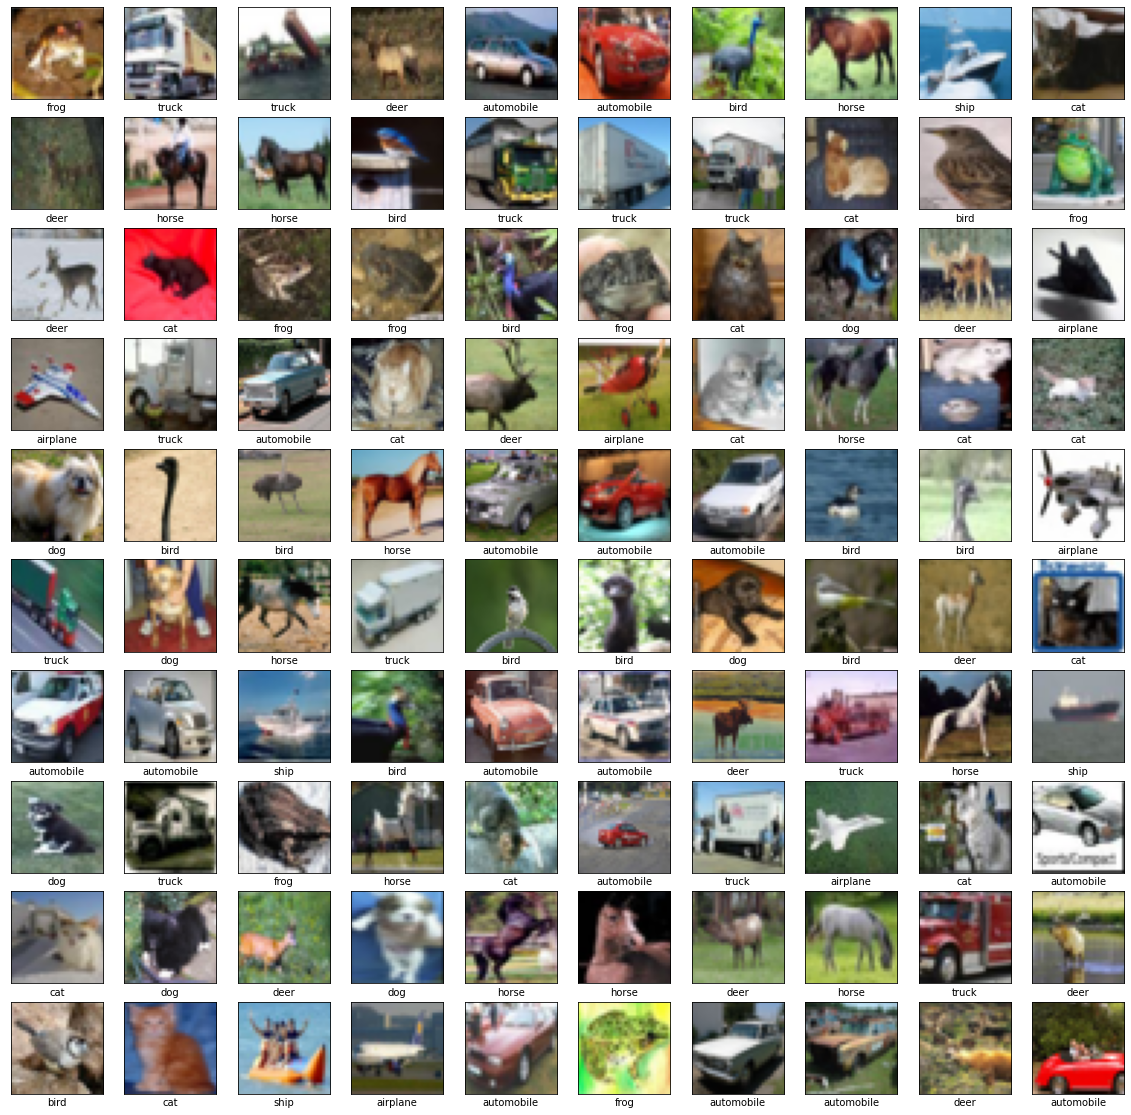

In [5]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(catagories[train_labels[i][0]])
plt.show()

In [6]:
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [8]:
train_images_norm = train_images.astype('float32')/255
test_images_norm = test_images.astype('float32')/255

In [9]:
h=model.fit(x=train_images_norm ,y=train_labels ,epochs=100,batch_size=64,validation_split=0.3)

Epoch 1/100
547/547 [==============================] - 69s 127ms/step - loss: 1.6723 - accuracy: 0.3765 - val_loss: 1.4177 - val_accuracy: 0.4772
Epoch 2/100
547/547 [==============================] - 69s 125ms/step - loss: 1.3002 - accuracy: 0.5313 - val_loss: 1.2142 - val_accuracy: 0.5665
Epoch 3/100
547/547 [==============================] - 67s 123ms/step - loss: 1.1249 - accuracy: 0.5972 - val_loss: 1.0951 - val_accuracy: 0.6140
Epoch 4/100
547/547 [==============================] - 55s 101ms/step - loss: 1.0160 - accuracy: 0.6408 - val_loss: 1.0900 - val_accuracy: 0.6119
Epoch 5/100
547/547 [==============================] - 70s 128ms/step - loss: 0.9105 - accuracy: 0.6793 - val_loss: 1.0020 - val_accuracy: 0.6573
Epoch 6/100
547/547 [==============================] - 73s 134ms/step - loss: 0.8268 - accuracy: 0.7087 - val_loss: 0.9569 - val_accuracy: 0.6718
Epoch 7/100
547/547 [==============================] - 60s 109ms/step - loss: 0.7509 - accuracy: 0.7350 - val_loss: 0.9587 -

547/547 [==============================] - 74s 135ms/step - loss: 0.0697 - accuracy: 0.9770 - val_loss: 2.7670 - val_accuracy: 0.6667
Epoch 57/100
547/547 [==============================] - 55s 100ms/step - loss: 0.0762 - accuracy: 0.9744 - val_loss: 2.8875 - val_accuracy: 0.6653
Epoch 58/100
547/547 [==============================] - 55s 101ms/step - loss: 0.0843 - accuracy: 0.9724 - val_loss: 2.8234 - val_accuracy: 0.6761
Epoch 59/100
547/547 [==============================] - 56s 102ms/step - loss: 0.0690 - accuracy: 0.9763 - val_loss: 2.8377 - val_accuracy: 0.6651
Epoch 60/100
547/547 [==============================] - 63s 116ms/step - loss: 0.0793 - accuracy: 0.9735 - val_loss: 2.8388 - val_accuracy: 0.6671
Epoch 61/100
547/547 [==============================] - 59s 107ms/step - loss: 0.0669 - accuracy: 0.9774 - val_loss: 2.9024 - val_accuracy: 0.6689
Epoch 62/100
547/547 [==============================] - 54s 99ms/step - loss: 0.0727 - accuracy: 0.9764 - val_loss: 2.8362 - val_ac

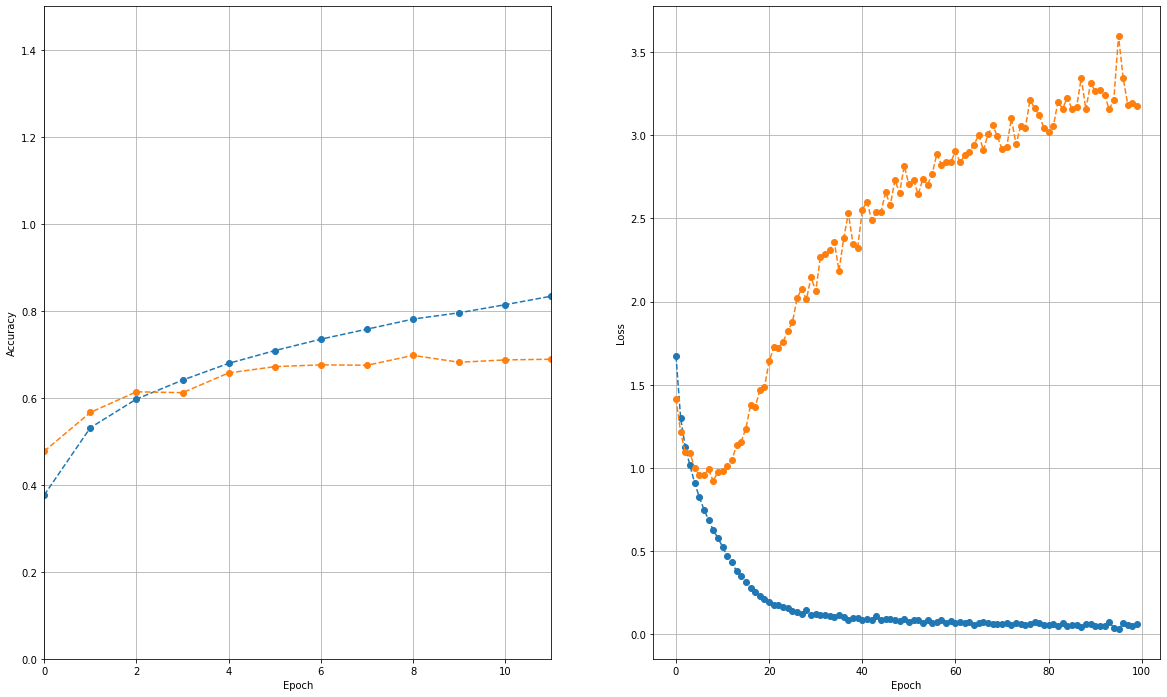

In [10]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'--o')
plt.plot(h.history['val_accuracy'],'--o')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,11])
plt.ylim([0,1.5])

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'--o')
plt.plot(h.history['val_loss'],'--o')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.savefig('accuracy.png')
plt.show()

In [11]:
test_loss,test_acc = model.evaluate(test_images_norm,test_labels)
print(test_acc,test_loss)

313/313 [==============================] - 5s 17ms/step - loss: 3.2134 - accuracy: 0.6617 0s - loss: 3.2326 - accuracy: 0. - ETA: 0s - loss: 3.237
0.6617000102996826 3.2134127616882324


In [14]:
p= model.predict(test_images_norm)

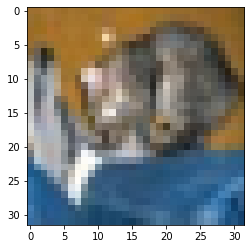

In [15]:
i = 0
plt.imshow(test_images_norm[i],cmap='gray_r')

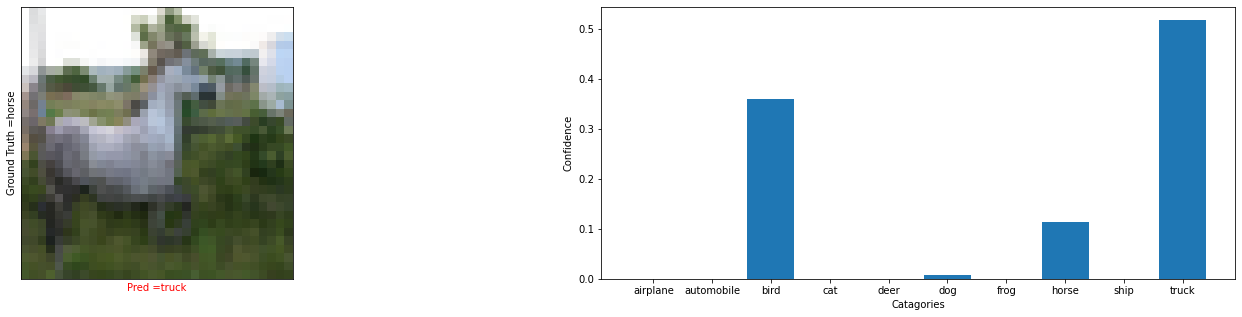

In [16]:
i=69
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.imshow(test_images_norm[i],cmap='gray_r')
plt.xticks([])
plt.yticks([])

if test_labels[i]==np.argmax(p[i]):
    plt.xlabel(f"Pred ={catagories[np.argmax(p[i])]}",color='g')
else:
    plt.xlabel(f"Pred ={catagories[np.argmax(p[i])]}",color='r')
    
    
    
plt.ylabel(f"Ground Truth ={catagories[test_labels[i][0]]}")


plt.subplot(1,2,2)
plt.bar(['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck'],p[i])
plt.ylabel('Confidence')
plt.xlabel('Catagories')
plt.savefig('result.png')
plt.show()